CMPE 258 Final Project Python 2.7 Version
1. Author: Tu Lan 011495497 tu.lan@sjsu.edu
2. Date: 05/06/2018
3. Tips: I'm using relative paths. If you are wokring on Windows, you might need to change all the paths to make the script work

In [5]:
# basic libraries     
import matplotlib.pyplot as plt
import numpy as np

# state control
state = 1
np.random.seed(state)

# To plot pretty figures
import seaborn as sns  # just a plot library. Not related to algorithms
%matplotlib inline
plt.style.use('seaborn')
sns.set(style="ticks", color_codes=True)

# Directories
PROJECT_ROOT_PATH = ''
DATA_PATH = 'data/'
MODEL_PATH = 'model/'
LOG_PATH = 'log/'
WEIGHT_PATH = 'weight/'
RESULT_PATH = 'result/'

Load Data

In [2]:
X_train = np.load(DATA_PATH + 'X_train_aug_flip_scale.npy')
y_train = np.load(DATA_PATH + 'y_train_aug_flip_scale.npy')
X_test = np.load(DATA_PATH + 'X_test.npy')
X_train.shape, y_train.shape, X_test.shape

((300, 512, 512, 1), (300, 512, 512, 1), (30, 512, 512, 1))

Split Training adn Validation Set

In [3]:
def split_train_val(X, y, ratio_train, state):
    # shuffle the sequence
    np.random.seed(state)
    num = len(y)
    shuffle_index = np.random.permutation(num)
    train_index = shuffle_index[:int(num * ratio_train)]
    val_index = shuffle_index[int(num * ratio_train):]
    X_train, y_train = X[train_index], y[train_index]
    X_val, y_val = X[val_index], y[val_index]
    return X_train, X_val, y_train, y_val


X_train, X_val, y_train, y_val = split_train_val(X_train, y_train, 0.9, state)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((270, 512, 512, 1), (30, 512, 512, 1), (270, 512, 512, 1), (30, 512, 512, 1))

Visualize the training data

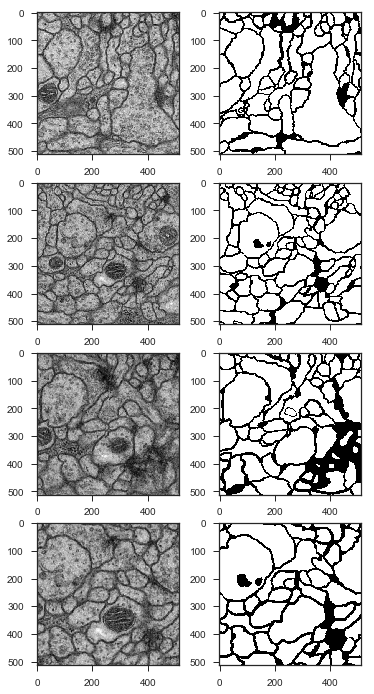

In [6]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(6, 12))
for row in range(4):
    ax[row, 0].imshow(X_train[row].reshape(512, 512), cmap='gray')
    ax[row, 1].imshow(y_train[row].reshape(512, 512), cmap='binary')
    
plt.show()

In [9]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard

from U_Net import u_net_fuse_v7
from Loss_Functions import dice_coef, dice_coef_loss, jaccard_coef, pixel_error, pixel_error_2

Load Model v7

In [10]:
model_unet_fuse_v7 = u_net_fuse_v7(input_shape=(512, 512, 1))
model_unet_fuse_v7.load_weights(WEIGHT_PATH + 'UNET_fuse_v7_weight.h5')

Show the model summary

In [11]:
model_unet_fuse_v7.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 1)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 512, 512, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 32) 320         lambda_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 512, 512, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation

Use the trained model to predict Training data

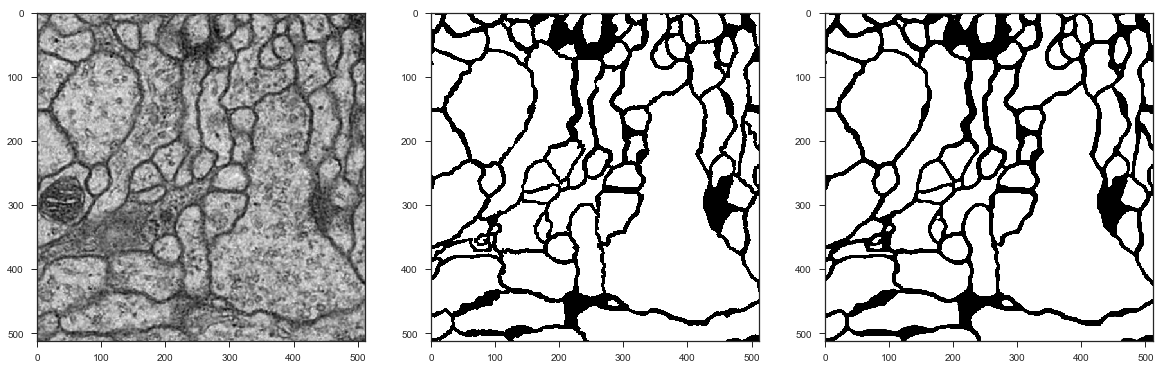

In [52]:
y_pred = model_unet_fuse_v7.predict(X_train[0].reshape((-1, 512, 512, 1)))[-1]
y_pred = y_pred.reshape((512, 512))
plt.figure(figsize=(20,16))
plt.subplot(1,3,1)
plt.imshow(X_train[0].reshape((512, 512)), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(y_train[0].reshape((512, 512)), cmap='binary')
plt.subplot(1,3,3)
plt.imshow(y_pred, cmap='binary')
plt.show()

Use the trained model to predict Test data

In [55]:
y_pred = model_unet_fuse_v7.predict(X_test, batch_size=5)
result_fuse = y_pred[-1]
result_fuse.shape

(30, 512, 512, 1)

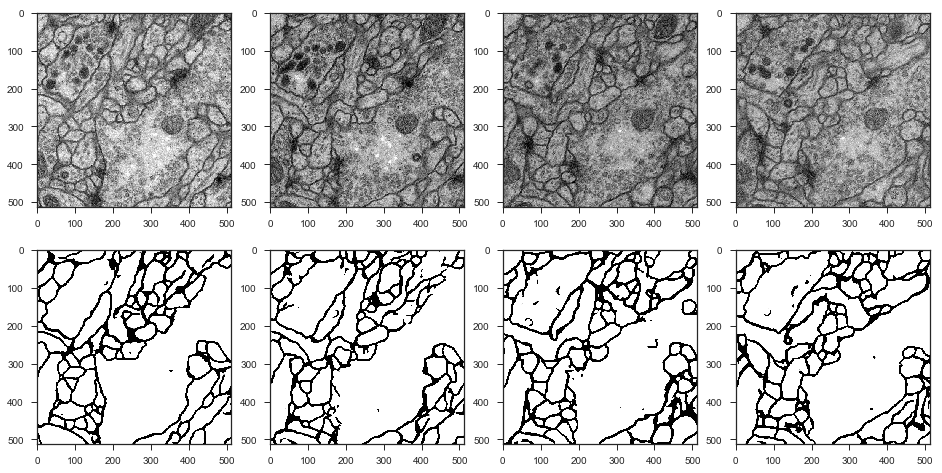

In [56]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
for row in range(2):
    for col in range(4):
        if row == 0:         
            ax[row, col].imshow(X_test[col].reshape(512, 512), cmap='gray')
        else:
            ax[row, col].imshow(result_fuse[col].reshape(512, 512), cmap='binary')

plt.show()